# PCA geometry 

In this section, we analyze the behavior of Principal Component Analysis (PCA) from a geometric perspective. We focus on PCA as a linear transformation, interpreting the principal components as linear combinations of the original features and examining the contribution (weights) of each feature. Finally, we explore dimensionality reduction by projecting the dataset into 2- and 3-dimensional spaces.
As we've mentioned, robust scaler is the best tool to do the feature scaling but in this notebook we'll compare this scaler against the standard scaler

In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.join('..','src'))
from preprocesing import robust_scaling, standarization

In [2]:
df = pd.read_csv("../data/raw/wine.csv")

In [3]:
quality = df['quality']
df_robust_scaled = robust_scaling(df.drop(['quality', 'Id'], axis=1))
df_standard_scaled = standarization(df.drop(['quality','Id'], axis=1))

Before applying PCA, the target variable (quality) was separated from the dataset. Since PCA operates exclusively on the feature space and is an unsupervised linear transformation, only the scaled features were used for dimensionality reduction.

## 2D PCA

In [4]:
from pca_utils import fit_pca, explained_variance, pca_loadings
n_components=2


To analyze the geometric behavior or PCA, we define first a PCA transformation with two principal components. This allow us to study how the original feature space is projected onto a lower-dimensional orthogonal subespace.

In [5]:
pca_2d_rob, rob_data_2d = fit_pca(df_robust_scaled,n_components)
pca_2d_std, std_data_2d = fit_pca(df_standard_scaled,n_components)

The PCA model is fitted using the scaled feature matrix. During this step, PCA identifies the orthogonal directions in the feature space that maximize the variance, defining a new ortonormal basis onto which the data will later be projected

In [6]:
rob_data_2d = pd.DataFrame(rob_data_2d, columns=['R PC1', 'R PC2'])
std_data_2d = pd.DataFrame(std_data_2d, columns=['Z PC1', 'Z PC2'])
std_data_2d.head()

,Z PC1,Z PC2
0,-1.560862,0.444697
1,-0.760559,1.914220
2,-0.707776,0.914023
3,2.307156,-0.224350
4,-1.560862,0.444697


After fitting PCA, the scaled data is projected onto the principal component basis. This transformation maps each observation from the original feature space to coordinates defined by the principal components, resulting in a lower-dimensional representation that preserves the dominant variance structure

In [7]:
loadings_rob_2d = pca_loadings(pca_2d_rob, df_robust_scaled.columns)
loadings_std_2d = pca_loadings(pca_2d_std, df_standard_scaled.columns)
loadings_rob_2d

,PC1,PC2
fixed acidity,0.084012,0.105273
volatile acidity,0.003274,-0.016553
citric acid,0.084515,0.052929
residual sugar,0.202629,0.938956
chlorides,0.938958,-0.240332
free sulfur dioxide,0.012810,0.067937
total sulfur dioxide,0.031584,0.088726
density,0.121876,0.172762
pH,-0.122285,-0.044532
sulphates,0.166135,-0.037501


In [8]:
loadings_std_2d

,PC1,PC2
fixed acidity,0.485339,-0.102328
volatile acidity,-0.227143,0.288786
citric acid,0.460075,-0.146508
residual sugar,0.174506,0.252262
chlorides,0.224870,0.153133
free sulfur dioxide,-0.047852,0.517022
total sulfur dioxide,0.015069,0.577393
density,0.399684,0.217537
pH,-0.432844,-0.006374
sulphates,0.237555,-0.062280


These tables reveal the internal structure of the principal components; in other words, they display the weights of the linear combinations of features that define PC1 and PC2. We observe that the loadings differ substantially between the StandardScaler and RobustScaler preprocessing pipelines. This occurs because PCA is applied to the covariance structure of the scaled data, which is altered differently depending on the chosen scaling method.

For instance, under StandardScaler, chlorides exhibit the largest weight in the first principal component, whereas under RobustScaler, fixed acidity dominates PC1. This demonstrates that the geometric representation learned by PCA is not intrinsic to the raw dataset but is instead strongly dependent on the feature scaling process.


### 2D PCA visualization

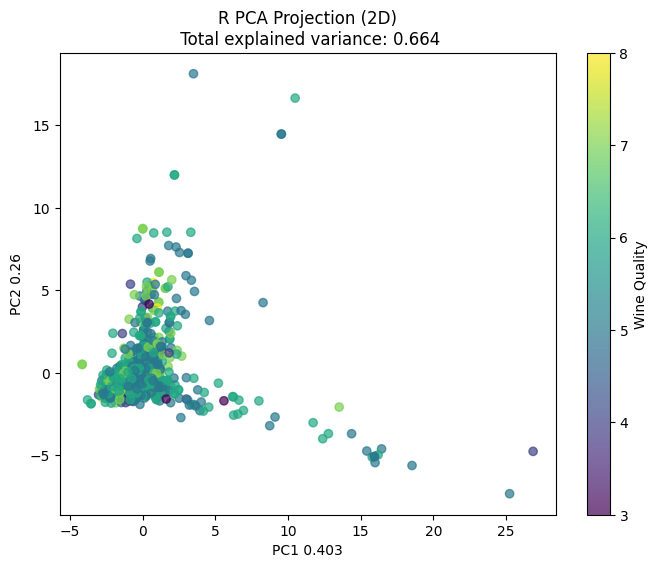

In [9]:
import matplotlib.pyplot as plt
r_variances_2d, c_var_2dr = explained_variance(pca_2d_rob)
plt.figure(figsize=(8,6))
scatter = plt.scatter(rob_data_2d['R PC1'], rob_data_2d['R PC2'], c=quality, alpha=0.7)
plt.xlabel(f"PC1 {r_variances_2d[0].round(3)}")
plt.ylabel(f"PC2 {r_variances_2d[1].round(3)}")
plt.title(f"R PCA Projection (2D)\n Total explained variance: {c_var_2dr.round(3)}")
plt.colorbar(scatter, label="Wine Quality")
plt.show()

After plotting the data in two dimensions, the first noticeable aspect is the absence of clearly defined clusters. This lack of class separation suggests that the target variable is not aligned with the directions of maximum variance identified by PCA. Although most observations are concentrated, a few outliers are clearly visible.

Since the first principal component captures the largest proportion of the total variance, distances between points are more pronounced along the PC1 axis than along PC2. This is reflected in the explained variance ratios: PC1 accounts for approximately 40% of the total variance, while PC2 explains about 26%. Consequently, the two-dimensional PCA representation preserves around 66% of the dataset’s variability. Adding a third principal component could increase the retained variance and potentially reveal additional geometric structure in a three-dimensional projection.

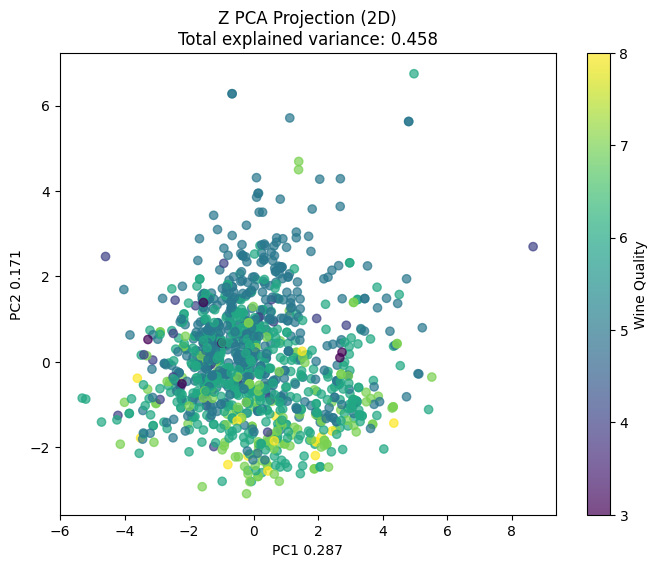

In [10]:
z_variances_2d, c_var_2dz = explained_variance(pca_2d_std)
plt.figure(figsize=(8,6))
scatter = plt.scatter(std_data_2d['Z PC1'], std_data_2d['Z PC2'], c=quality, alpha=0.7)
plt.xlabel(f"PC1 {z_variances_2d[0].round(3)}")
plt.ylabel(f"PC2 {z_variances_2d[1].round(3)}")
plt.title(f"Z PCA Projection (2D)\nTotal explained variance: {c_var_2dz.round(3)}")
plt.colorbar(scatter, label="Wine Quality")
plt.show()

In this case, we observe that the explained variance ratios of the first two principal components are lower than those obtained using RobustScaler. This indicates that the first principal component captures a smaller fraction of the total dataset variance, suggesting that more components would be required to achieve a comparable level of variance preservation.

Despite this reduction in explained variance, the projection appears more spatially spread, as the data are not as tightly concentrated along a single direction. However, similar to the RobustScaler case, no clearly defined clusters emerge. This confirms that although PCA is a useful technique for dimensionality reduction and geometric analysis, it does not guarantee the emergence of cluster structures, as it does not optimize for class separation.

## 3D PCA

In [11]:
pca_3d_rob, rob_data_3d = fit_pca(df_robust_scaled,3)
pca_3d_std, std_data_3d = fit_pca(df_standard_scaled,3)
rob_data_3d = pd.DataFrame(rob_data_3d, columns=['R PC1','R PC2','R PC3'])
std_data_3d = pd.DataFrame(std_data_3d, columns=['Z PC1', 'Z PC2', 'Z PC3'])
std_data_3d

,Z PC1,Z PC2,Z PC3
0,-1.560862,0.444697,-1.766436
1,-0.760559,1.914220,-0.863780
2,-0.707776,0.914023,-1.141863
3,2.307156,-0.224350,0.256783
4,-1.560862,0.444697,-1.766436
...,...,...,...
1138,-1.441602,0.332007,1.137315
1139,-1.222463,0.921215,0.027222
1140,-2.123706,0.873422,0.626298
1141,-2.207569,0.927936,1.814609


In [12]:
loadings_rob_3d = pca_loadings(pca_3d_rob, df_robust_scaled.columns)
loadings_std_3d = pca_loadings(pca_3d_std, df_standard_scaled.columns)
loadings_rob_3d

,PC1,PC2,PC3
fixed acidity,0.084012,0.105273,0.603532
volatile acidity,0.003274,-0.016553,-0.255166
citric acid,0.084515,0.052929,0.311669
residual sugar,0.202629,0.938956,-0.178683
chlorides,0.938958,-0.240332,-0.171531
free sulfur dioxide,0.012810,0.067937,-0.199741
total sulfur dioxide,0.031584,0.088726,-0.178284
density,0.121876,0.172762,0.355177
pH,-0.122285,-0.044532,-0.419998
sulphates,0.166135,-0.037501,0.188501


In [13]:
loadings_std_3d

,PC1,PC2,PC3
fixed acidity,0.485339,-0.102328,-0.122376
volatile acidity,-0.227143,0.288786,-0.443718
citric acid,0.460075,-0.146508,0.246843
residual sugar,0.174506,0.252262,0.091359
chlorides,0.224870,0.153133,-0.052562
free sulfur dioxide,-0.047852,0.517022,0.428288
total sulfur dioxide,0.015069,0.577393,0.323424
density,0.399684,0.217537,-0.334238
pH,-0.432844,-0.006374,0.059923
sulphates,0.237555,-0.062280,0.302768


### 3D PCA Visualization

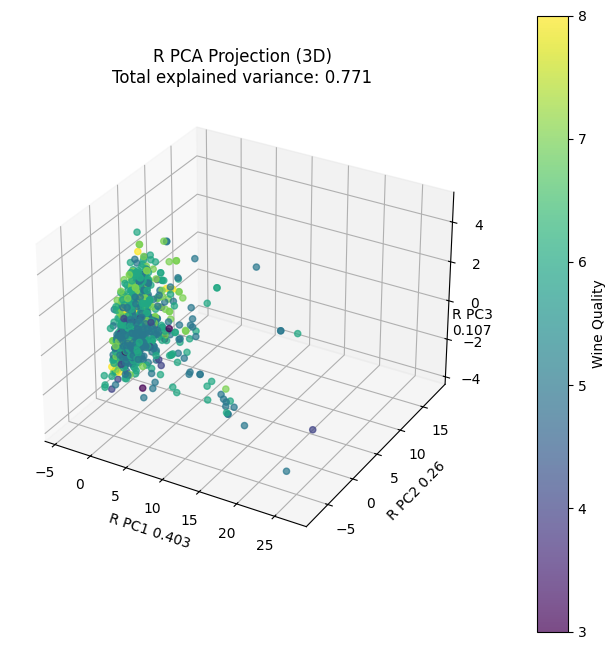

In [14]:
from mpl_toolkits.mplot3d import Axes3D
r_variances_3d, c_var_3dr =explained_variance(pca_3d_rob)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rob_data_3d['R PC1'], rob_data_3d['R PC2'], rob_data_3d['R PC3'], c=quality, alpha=0.7)
ax.set_xlabel(f'R PC1 {r_variances_3d[0].round(3)}')
ax.set_ylabel(f'R PC2 {r_variances_3d[1].round(3)}')
ax.text2D(0.95,0.475,f"R PC3\n{r_variances_3d[2].round(3)}", transform=ax.transAxes)
cbar = fig.colorbar(scatter,ax=ax,pad=0.1)
cbar.set_label("Wine Quality")
plt.title(f'R PCA Projection (3D)\nTotal explained variance: {c_var_3dr.round(3)}')
plt.show()

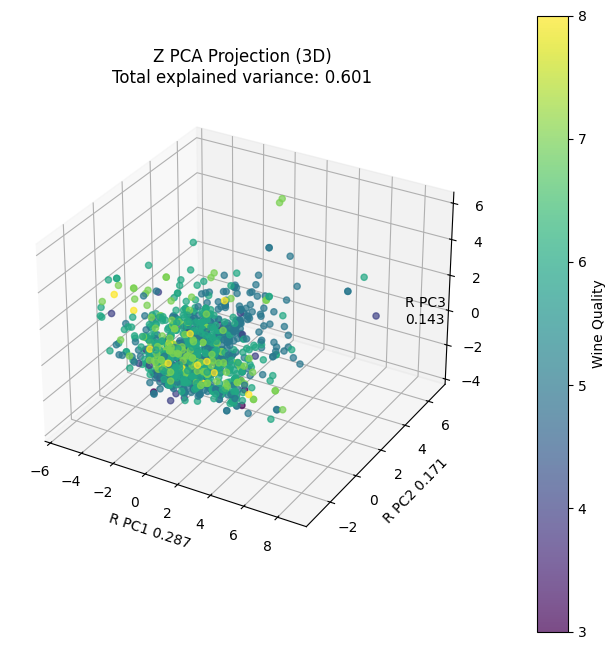

In [15]:
z_variances_3d, c_var_3dz = explained_variance(pca_3d_std)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(std_data_3d['Z PC1'], std_data_3d['Z PC2'], std_data_3d['Z PC3'], c=quality, alpha=0.7)
ax.set_xlabel(f'R PC1 {z_variances_3d[0].round(3)}')
ax.set_ylabel(f'R PC2 {z_variances_3d[1].round(3)}')
ax.text2D(0.85,0.5,f"R PC3\n{z_variances_3d[2].round(3)}", transform=ax.transAxes)
cbar = fig.colorbar(scatter,ax=ax,pad=0.1)
cbar.set_label("Wine Quality")
plt.title(f'Z PCA Projection (3D)\nTotal explained variance: {c_var_3dz.round(3)}')
plt.show()

The 3D plots introduce a third principal component, although with less explained variance. In both scaling approaches, the third component captures less than 15% of the total variance; however, it still helps provide a richer understanding of the data geometry. For instance, under both scalers, the third component shows a slight influence related to wine quality, since lower-quality wines (purple points) tend to lie below zero along the PC3 axis. This is a noteworthy observation, given that the loadings of the third component differ substantially between scalers: in the Robust Scaler, PC3 is dominated by fixed acidity, whereas in the Standard Scaler, alcohol has the largest contribution.

It is also important to note that the 3D PCA representation using the Robust Scaler retains approximately 77% of the total variance, which is significantly higher than the 60% retained by the Standard Scaler. This supports the choice of Robust Scaling for this investigation, as it preserves more of the dataset’s variability in a low-dimensional representation.

# Conclusion

Concluding the PCA geometry analysis across scaling approaches, we observe that although the data appears noisier under Robust Scaling, it preserves a larger proportion of the total variance. This makes Robust Scaling more suitable for analyzing the dataset in lower-dimensional spaces while retaining its essential geometric structure. Given the nature of the original data—characterized by the presence of outliers in several features—we will adopt Robust Scaling for the KNN analysis. This decision is further supported by the variance-retention results discussed previously.

Now that we understand how the data is transformed under a linear mapping from ℝ¹¹ to ℝ² or ℝ³, we are prepared to analyze nearest-neighbor behavior in the next notebook using the PCA representations that retain the largest proportion of the total variance.

In [17]:
rob_data_2d.columns = ['PC1', 'PC2']
rob_data_3d.columns = ['PC1', 'PC2', 'PC3']
rob_data_2d.to_csv('../data/clean/wine_2d.csv', index=0)
rob_data_3d.to_csv('../data/clean/wine_3d.csv', index=0)